In [3]:
import numpy as np

# course topic: 基因演算法

def F1(t):
    """
    假設一個線性function
    """
    return 0.063*(t**3) -5.284*(t**2)+ 4.887*t+ 412+ np.random.normal(0, 1)

n =10000
b = np.zeros((n, 1))
t = np.zeros((n, 1))
for i in range(n):
    t[i] = np.random.random()*100
    b[i] = F1(t[i])

In [13]:
def F2(t, A, B, C, D):
    """
    非線性的function
    """
    return A*(t**B) + C*np.cos(D*t)+np.random.normal(0, 1, t.shape)


In [6]:
# energy function, 暴力解
def E(t, b, A, B, C, D):
    return np.sum(abs(b - F2(t, A, B, C, D)))

In [4]:
A = np.zeros((n, 5))

for i in range(n):
    A[i, 0] = t[i]**4
    A[i, 1] = t[i]**3
    A[i, 2] = t[i]**2
    A[i, 3] = t[i]
    A[i, 4] = 1

# 檢查是否跟F1參數接近
x = np.linalg.lstsq(A, b)[0]
print(x)

[[ 3.09881830e-09]
 [ 6.29990249e-02]
 [-5.28389601e+00]
 [ 4.88312804e+00]
 [ 4.12015743e+02]]
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


In [14]:
t2 = np.random.random((n, 1))*100
# 答案
b2 = F2(t2, 0.6, 1.2, 100, 0.4)

# 假設猜對
print(E(t2, b2, 0.6, 1.2, 100, 0.4))

11396.632392735195


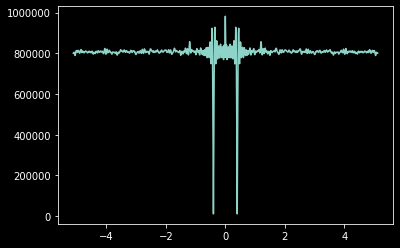

In [16]:
import matplotlib.pyplot as plt

X = np.zeros((1024, 1))
Y = np.zeros((1024, 1))
for i in range(1024):
    X[i] = -5.11 + i*0.01
    Y[i] = E(t2, b2, 0.6, 1.2, 100, X[i])

plt.plot(X, Y)

In [20]:
Z = np.zeros((1024, 1024))
# 跑2^20, 10分鐘
for i in range(1024):
    X[i] = -5.11 + i*0.01
    for j in range(1024):
        Y[j] = -511+j
        Z[i, j] = E(t2, b2, X[i], 1.2, Y[j], 0.4)

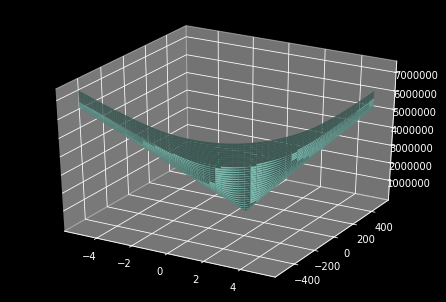

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)

In [26]:
pop = np.random.randint(0, 2, (10000, 40))
# 適不適合存活
fit = np.zeros((10000, 1))

for generation in range(10):
    print(generation)
    for i in range(10000):
        gene = pop[i, :]
        # 基因0到9轉成2進制 => sum後變成1023
        A = (np.sum(2**np.array(range(10))*gene[:10])-511)/ 100
        B = (np.sum(2**np.array(range(10))*gene[10:20])-511)/ 100
        C = np.sum(2**np.array(range(10))*gene[20:30])-511
        D = (np.sum(2**np.array(range(10))*gene[30:])-511)/ 100
        fit[i] = E(t2, b2, A, B, C, D)
    sortf = np.argsort(fit[:, 0])
    pop = pop[sortf, :]
    for i in range(100, 10000):
        fid = np.random.randint(0, 100)
        mid = np.random.randint(0, 100)
        while mid == fid:
            mid = np.random.randint(0, 100)
        mask = np.random.randint(0, 2, (1, 40))
        son = pop[mid, :]
        father = pop[fid, :]
        son[mask[0, :]==1] = father[mask[0, :]==1]
        pop[i, :] = son
    # 突變
    for i in range(1000):
        m = np.random.randint(0, 10000)
        n = np.random.randint(0, 40)
        pop[m,n] = 1-pop[m,n]

for i in range(10000):
    gene = pop[i, :]
    # 基因0到9轉成2進制 => sum後變成1023
    A = (np.sum(2**np.array(range(10))*gene[:10])-511)/ 100
    B = (np.sum(2**np.array(range(10))*gene[10:20])-511)/ 100
    C = np.sum(2**np.array(range(10))*gene[20:30])-511
    D = (np.sum(2**np.array(range(10))*gene[30:])-511)/ 100
    fit[i] = E(t2, b2, A, B, C, D)
sortf = np.argsort(fit[:, 0])
pop = pop[sortf, :]

gene = pop[0, :]
A = (np.sum(2**np.array(range(10))*gene[:10])-511)/ 100
B = (np.sum(2**np.array(range(10))*gene[10:20])-511)/ 100
C = np.sum(2**np.array(range(10))*gene[20:30])-511
D = (np.sum(2**np.array(range(10))*gene[30:])-511)/ 100

print(A, B, C, D)


0
1
2
3
4
5
6
7
8
9
0.45 1.28 16 1.25
